In [1]:
import os

In [2]:
os.chdir('../')

In [3]:
import FeedForwardANN as FFANN
import numpy as np

%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt


plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'

In [4]:
os.chdir('example')

In [5]:
lin=FFANN.linearActivation()
sig=FFANN.sigmoidActivation()
exp=FFANN.expActivation()



In [6]:
def Q_i(signal,target):
#     return 1/4*np.log((signal-target)**2)**2.
    return (signal-target)**2.

def dQds_i(signal,target):
#     return np.log((signal-target)**2)/(signal-target)
    return 2.*(signal-target)

In [7]:
_=np.loadtxt('eos2020.dat')
T=np.array([[np.log10(i[0])] for i in _[:,] ])
rdof=np.array([[i[1],i[2]] for i in _[:]])
# rdof=np.array([[np.log(i[1]),np.log(i[2])] for i in _[1:]])

In [8]:
brain=FFANN.FFANN(1,2,[6],[sig,lin])

brain.init_params(-1e-1,1e-1)



Q=FFANN.loss(Q_i, dQds_i, brain)



# strategy=FFANN.VanillaSGD(brain,Q,alpha=1e-1)
# strategy=FFANN.RMSpropSGD(brain,Q,gamma=0.999,epsilon=1e-5,alpha=1e-2)
strategy=FFANN.AdaDeltaSGD(brain,Q,gamma=0.995,epsilon=1e-4,alpha=1)

In [9]:
brain.SGD(strategy, T, rdof, abs_tol=1e-2, rel_tol=1e-2, step_break=100,max_step=50000)

50001


In [10]:
brain.inputSignal([5])
brain.feedForward()    
brain.signals[-1]
brain.signals[-1],rdof[-1]

([104.35390543841665, 104.34237210285323], array([104.43 , 104.435]))

In [11]:
brain.inputSignal([-5])
brain.feedForward()
brain.signals[-1],rdof[0]

([3.7727775697115087, 3.185919655677687], array([3.93094, 3.38308]))

<IPython.core.display.Javascript object>


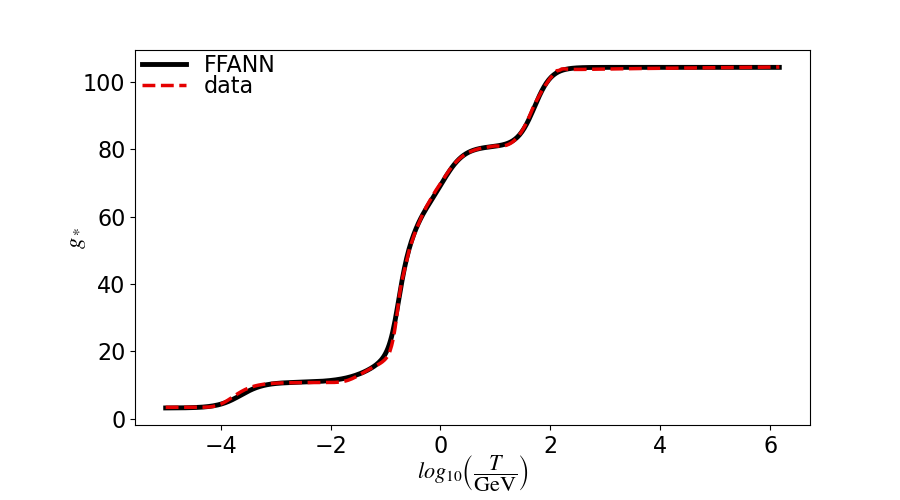

In [12]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

g=[]
for logT in T:
    brain.inputSignal(logT)
    brain.feedForward()    
    g.append(brain.signals[-1][1]) 
g=np.array(g)
sub.plot(T,g,linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'FFANN')
sub.plot(T,rdof[:,1],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'$g_{\rm *}$')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()

<IPython.core.display.Javascript object>


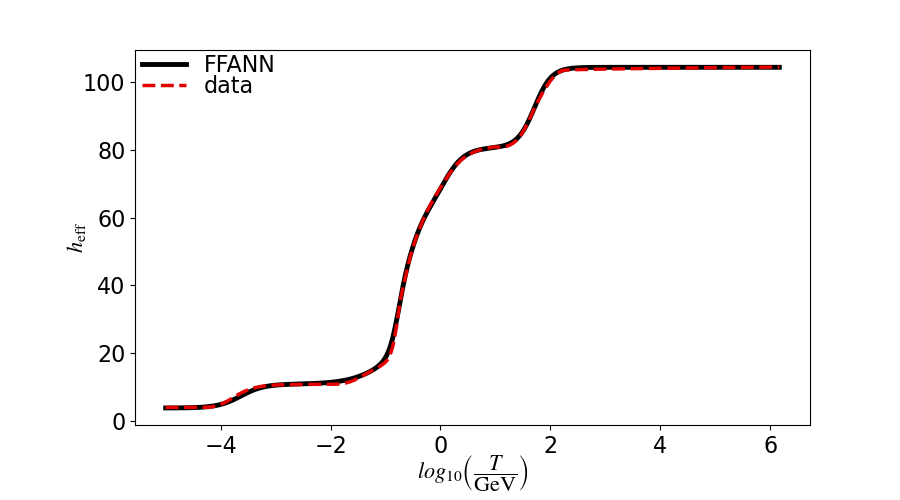

In [13]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

h=[]
for logT in T:
    brain.inputSignal(logT)
    brain.feedForward()    
    h.append(brain.signals[-1][0])
    
h=np.array(h)
sub.plot(T,h,linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'FFANN')
sub.plot(T,rdof[:,0],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'$h_{\rm eff}$')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()

<IPython.core.display.Javascript object>


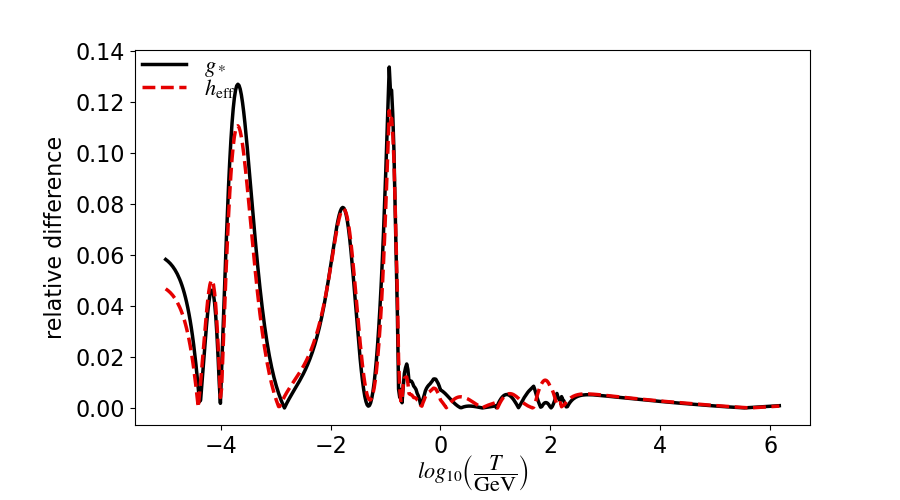

In [14]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

    
sub.plot(T,np.abs(g-rdof[:,1])/rdof[:,1],linestyle='-',linewidth=2.5,alpha=1,c='xkcd:black',label=r'$g_{\rm *}$')
sub.plot(T,np.abs(h-rdof[:,0])/rdof[:,1],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'$h_{\rm eff}$')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'relative difference')
sub.yaxis.set_label_coords(-0.1,0.5) 


fig.show()